In [1]:
import time, os
import numpy as np, pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# 153 total number of constraints
iterate = [20, 40, 60, 80, 100, 120, 140]
n = 10

g = open("../Pima/pima_constraints.txt", "rt")
constraint = g.readlines()
g.close()


num_files = len(iterate)
runningTime = iterate

means = []
lowerbound = []
upperbound = []

runtime_data = pd.DataFrame(columns=iterate, index=range(1,n+1))
fake_data = pd.DataFrame(columns=iterate, index=range(1,n+1))
synth_runtime = pd.DataFrame(columns=iterate, index=range(1, n+1))

### Testing data

for num_constraints in iterate:
        arr_constraints = [] # size num_constraints in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,152), num_constraints)
        for i in range(1,11):
#             timeRun = createFile(arr_constraints)
            fake_data.loc[i,num_constraints] = random.random()
    
fake_data.to_csv('runtime_data.csv')

fake_data

In [3]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
#         print("new constraints used")
        
        for i in range(1, n + 1):
            arr_constraints = random.sample(range(0,153), num_constraints)
            timeRun = createFile(arr_constraints)
            synth_runtime.loc[i,num_constraints] = timeRun
            arr_runtimes.append(timeRun)
            arr_constraints = []
    
synth_runtime.to_csv('pima_runtime_anal.csv')


def createFile(constraints):
    f = open('pima_graph.smt2', 'w')
    h = open("../Pima/pimaGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
#         print(constraint[j])
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 pima_graph.smt2')

    runTime = time.time() - start_time
#     print(runTime)
    # runs through getStates function to use for mean calculation
    return runTime


In [4]:
getStates()

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (ite (>= 166.0 Glucose) (ite (>= (/ 13 2) Pregnancies) (ite (>= (/ 5 2) Pregnancies) (ite (>= 125.0 Glucose) (ite (>= (/ 12134337997436523 100000000000000) Glucose) (ite (>= (/ 213 2) Glucose) false (>= (/ 2175371 16384) Insulin)) true) (ite (<= 143.0 Glucose) true false)) (<= 40.0 SkinThickness)) true) false))
)
0.46683168411254883
(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= (/ 13 2) Pregnancies))) (ite (>= 166.0 Glucose) (ite (>= 85.0 BloodPressure) (ite (<= 143.0 Glucose) false (ite (>= (/ 21 2) Pregnancies) (ite (<= (/ 189 2) Glucose) (ite (<= (/ 213 2) Glucose) (ite _let_1 (ite (>= 125.0 Glucose) (ite (<= 125.0 Glucose) true (ite (<= (/ 1213

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_2 (<= (/ 189 2) Glucose))) (let ((_let_3 (<= 85.0 BloodPressure))) (let ((_let_4 (<= 143.0 Glucose))) (let ((_let_5 (<= (/ 13 2) Pregnancies))) (ite (>= (/ 21 2) Pregnancies) (ite (>= 40.0 SkinThickness) (ite _let_2 (ite (<= (/ 5 2) Pregnancies) (ite (<= (/ 213 2) Glucose) (ite _let_1 (ite _let_5 false (ite _let_4 (ite (<= 166.0 Glucose) (<= (/ 75 2) Age) false) (ite _let_3 true (<= (/ 83 2) BodyMassIndex)))) (ite _let_5 true false)) (ite (>= (/ 13 2) Pregnancies) false (<= (/ 2175371 16384) Insulin))) (ite (>= (/ 213 2) Glucose) false (ite _let_1 (ite (<= 125.0 Glucose) (ite _let_4 true (<= (/ 27550000190734863 1000000000000000) BodyMassIndex)) true) (ite _let_3 (>= (/ 65 2) Age) (<= (/ 2564999982714653 5000000000000000) Dia

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_2 (>= 215.0 Insulin))) (let ((_let_3 (<= (/ 2175371 16384) Insulin))) (let ((_let_4 (>= (/ 13 2) Pregnancies))) (let ((_let_5 (>= (/ 119 2) Age))) (let ((_let_6 (<= (/ 27550000190734863 1000000000000000) BodyMassIndex))) (let ((_let_7 (<= (/ 5 2) Pregnancies))) (let ((_let_8 (<= 166.0 Glucose))) (let ((_let_9 (<= 143.0 Glucose))) (ite (>= 85.0 BloodPressure) (ite (>= 40.0 SkinThickness) (ite (>= (/ 21 2) Pregnancies) (ite (>= (/ 83 2) BodyMassIndex) (ite _let_2 (ite (<= (/ 189 2) Glucose) (ite (<= (/ 213 2) Glucose) (ite _let_3 (ite _let_1 (ite (<= 125.0 Glucose) (ite _let_4 (ite _let_7 (ite _let_9 (ite _let_8 (>= (/ 5167500078678131 5000000000000000) DiabetesPedigreeFunction) false) _let_5) (ite _let_9 (ite _let_8 true _let_

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 247 2) Glucose))) (let ((_let_2 (<= (/ 2175371 16384) Insulin))) (let ((_let_3 (<= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_4 (<= (/ 213 2) Glucose))) (let ((_let_5 (<= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_6 (<= 31.0 Age))) (let ((_let_7 (<= (/ 13 2) Pregnancies))) (let ((_let_8 (<= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_9 (>= 166.0 Glucose))) (let ((_let_10 (<= (/ 189 2) Glucose))) (let ((_let_11 (<= 143.0 Glucose))) (let ((_let_12 (>= 85.0 BloodPressure))) (ite (>= 40.0 SkinThickness) (ite (<= (/ 27550000190734863 1000000000000000) BodyMassIndex) (ite _let_5 (ite _let_3 (ite _let_9 (ite _let_2 (ite _let_12 (ite _let_10 (ite _let_4 (ite _let_8 (ite (<= (/ 83 2) BodyMassIndex) true (

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= (/ 83 2) BodyMassIndex))) (let ((_let_2 (>= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_3 (>= 166.0 Glucose))) (let ((_let_4 (>= 215.0 Insulin))) (let ((_let_5 (>= 85.0 BloodPressure))) (let ((_let_6 (<= (/ 83 2) BodyMassIndex))) (let ((_let_7 (>= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_8 (>= 125.0 Glucose))) (let ((_let_9 (>= 143.0 Glucose))) (let ((_let_10 (>= (/ 5 2) Pregnancies))) (let ((_let_11 (>= (/ 13 2) Pregnancies))) (let ((_let_12 (>= 40.0 SkinThickness))) (let ((_let_13 (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_14 (>= (/ 213 2) Glucose))) (let ((_let_15 (ite _let_11 (ite _let_3 (ite _let_10 false (ite _let_14 false _let_13)) true) false))) (let ((_let_16 (ite _let_9 (ite _let_8 

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 21 2) Pregnancies))) (let ((_let_2 (<= (/ 2175371 16384) Insulin))) (let ((_let_3 (<= (/ 213 2) Glucose))) (let ((_let_4 (>= 125.0 Glucose))) (let ((_let_5 (>= 143.0 Glucose))) (let ((_let_6 (ite _let_5 (ite _let_4 (ite (>= (/ 12184337997436523 100000000000000) Glucose) (ite _let_3 (ite _let_1 false (<= (/ 65 2) Age)) (ite _let_1 false _let_2)) true) (ite _let_1 true false)) (ite _let_1 (<= (/ 83 2) BodyMassIndex) (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))))) (let ((_let_7 (>= 166.0 Glucose))) (let ((_let_8 (<= (/ 75 2) Age))) (let ((_let_9 (>= 85.0 BloodPressure))) (let ((_let_10 (ite _let_9 (ite _let_7 _let_6 (ite _let_1 true _let_8)) (ite _let_7 _let_6 (<= 215.0 Insulin))))) (let ((_let_11 (<= (/ 5 2) Pregnancies))) (let ((_let_12 (<= 31.0 Age))) (let (

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= 143.0 Glucose))) (let ((_let_2 (>= 40.0 SkinThickness))) (let ((_let_3 (>= (/ 21 2) Pregnancies))) (let ((_let_4 (<= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_5 (>= (/ 2175371 16384) Insulin))) (let ((_let_6 (>= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_7 (>= 125.0 Glucose))) (let ((_let_8 (>= (/ 13 2) Pregnancies))) (let ((_let_9 (>= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_10 (>= 85.0 BloodPressure))) (let ((_let_11 (>= 166.0 Glucose))) (let ((_let_12 (>= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_13 (<= (/ 27550000190734863 1000000000000000) BodyMassIndex))) (let ((_let_14 (>= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_15

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (ite (>= (/ 12134337997436523 100000000000000) Glucose) false true))) (let ((_let_2 (>= 125.0 Glucose))) (let ((_let_3 (>= 143.0 Glucose))) (let ((_let_4 (>= (/ 13 2) Pregnancies))) (let ((_let_5 (>= 85.0 BloodPressure))) (let ((_let_6 (>= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_7 (>= (/ 83 2) BodyMassIndex))) (let ((_let_8 (>= 40.0 SkinThickness))) (let ((_let_9 (>= (/ 5 2) Pregnancies))) (let ((_let_10 (<= (/ 213 2) Glucose))) (let ((_let_11 (<= (/ 27550000190734863 1000000000000000) BodyMassIndex))) (let ((_let_12 (>= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_13 (<= (/ 189 2) Glucose))) (let ((_let_14 (>= 166.0 Glucose))) (let ((_let_15 (>= 215.0 Insulin))) (let ((_let_16 (ite _let_4 false true))) (let ((_let_17 

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 13 2) Pregnancies))) (let ((_let_2 (<= (/ 5 2) Pregnancies))) (let ((_let_3 (<= (/ 65 2) Age))) (let ((_let_4 (>= (/ 5 2) Pregnancies))) (let ((_let_5 (<= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_6 (<= (/ 2175371 16384) Insulin))) (let ((_let_7 (<= 125.0 Glucose))) (let ((_let_8 (<= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_9 (>= 40.0 SkinThickness))) (let ((_let_10 (<= (/ 83 2) BodyMassIndex))) (let ((_let_11 (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_12 (<= 85.0 BloodPressure))) (let ((_let_13 (ite _let_12 true _let_11))) (let ((_let_14 (>= 143.0 Glucose))) (let ((_let_15 (<= (/ 21 2) Pregnancies))) (let ((_let_16 (ite _let_15 true false))) (ite (<= (/ 189 2) Glucose) (ite (<= (/ 213 2

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= (/ 13 2) Pregnancies))) (let ((_let_2 (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_3 (<= (/ 5 2) Pregnancies))) (let ((_let_4 (>= 85.0 BloodPressure))) (let ((_let_5 (<= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_6 (<= (/ 2175371 16384) Insulin))) (let ((_let_7 (>= 166.0 Glucose))) (let ((_let_8 (>= (/ 21 2) Pregnancies))) (let ((_let_9 (<= (/ 213 2) Glucose))) (let ((_let_10 (<= (/ 189 2) Glucose))) (let ((_let_11 (>= (/ 247 2) Glucose))) (let ((_let_12 (>= 125.0 Glucose))) (let ((_let_13 (>= 143.0 Glucose))) (let ((_let_14 (ite (<= 215.0 Insulin) (ite _let_13 true false) (ite _let_13 (ite (<= 125.0 Glucose) (ite _let_12 true false) (ite _let_11 false true)) false)))) (let ((_let_15 (ite (>= 215.0 Insulin) (ite 

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= (/ 189 2) Glucose))) (let ((_let_2 (>= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_3 (>= 166.0 Glucose))) (let ((_let_4 (>= (/ 5537499785423279 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_5 (>= (/ 83 2) BodyMassIndex))) (let ((_let_6 (<= (/ 5 2) Pregnancies))) (let ((_let_7 (>= 215.0 Insulin))) (let ((_let_8 (>= (/ 377812497317791 625000000000000) DiabetesPedigreeFunction))) (let ((_let_9 (>= 40.0 SkinThickness))) (let ((_let_10 (>= 85.0 BloodPressure))) (let ((_let_11 (<= (/ 2175371 16384) Insulin))) (let ((_let_12 (>= 143.0 Glucose))) (let ((_let_13 (ite _let_12 false true))) (let ((_let_14 (>= (/ 13 2) Pregnancies))) (let ((_let_15 (ite _let_14 false true))) (let ((_let_16 (>= 125.0 Glucose))) (let ((_let_17 (<= (/ 27550000190734863 10

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 27550000190734863 1000000000000000) BodyMassIndex))) (let ((_let_2 (>= 215.0 Insulin))) (let ((_let_3 (>= (/ 5537499785423279 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_4 (<= (/ 213 2) Glucose))) (let ((_let_5 (>= (/ 83 2) BodyMassIndex))) (let ((_let_6 (>= 85.0 BloodPressure))) (let ((_let_7 (<= 31.0 Age))) (let ((_let_8 (>= (/ 13 2) Pregnancies))) (let ((_let_9 (>= (/ 377812497317791 625000000000000) DiabetesPedigreeFunction))) (let ((_let_10 (ite _let_8 false true))) (let ((_let_11 (>= (/ 2175371 16384) Insulin))) (let ((_let_12 (ite _let_11 false true))) (let ((_let_13 (ite _let_7 true false))) (let ((_let_14 (>= (/ 5 2) Pregnancies))) (let ((_let_15 (<= 125.0 Glucose))) (let ((_let_16 (>= 166.0 Glucose))) (let ((_let_17 (>= 125.0 Glucose))) (let ((_let_18 (ite _l

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= 215.0 Insulin))) (let ((_let_2 (>= 40.0 SkinThickness))) (let ((_let_3 (>= (/ 21 2) Pregnancies))) (let ((_let_4 (>= 85.0 BloodPressure))) (let ((_let_5 (<= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_6 (>= (/ 83 2) BodyMassIndex))) (let ((_let_7 (>= 166.0 Glucose))) (let ((_let_8 (<= (/ 189 2) Glucose))) (let ((_let_9 (<= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_10 (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_11 (<= (/ 2175371 16384) Insulin))) (let ((_let_12 (<= (/ 13 2) Pregnancies))) (let ((_let_13 (<= (/ 27550000190734863 1000000000000000) BodyMassIndex))) (let ((_let_14 (<= 31.0 Age))) (let ((_let_15 (ite _let_14 true false))) (let ((_let_16 (<= (/ 377812497317791 6250000

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (<= (/ 3004999905824661 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_2 (<= (/ 2620000094175339 10000000000000000) DiabetesPedigreeFunction))) (let ((_let_3 (ite _let_2 (ite _let_1 true false) false))) (let ((_let_4 (>= 166.0 Glucose))) (let ((_let_5 (>= 215.0 Insulin))) (let ((_let_6 (<= (/ 2175371 16384) Insulin))) (let ((_let_7 (>= (/ 5537499785423279 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_8 (<= (/ 247 2) Glucose))) (let ((_let_9 (<= (/ 12134337997436523 100000000000000) Glucose))) (let ((_let_10 (<= (/ 213 2) Glucose))) (let ((_let_11 (<= (/ 189 2) Glucose))) (let ((_let_12 (<= (/ 21 2) Pregnancies))) (let ((_let_13 (ite _let_12 true false))) (let ((_let_14 (>= (/ 21 2) Pregnancies))) (let ((_let_15 (<= (/ 27550000190734863 1000000000000000) BodyMassInde

(
(define-fun rig_mimic ((Pregnancies Real) (Glucose Real) (BloodPressure Real) (SkinThickness Real) (Insulin Real) (BodyMassIndex Real) (DiabetesPedigreeFunction Real) (Age Real)) Bool (let ((_let_1 (>= 125.0 Glucose))) (let ((_let_2 (ite _let_1 false true))) (let ((_let_3 (>= 166.0 Glucose))) (let ((_let_4 (ite _let_3 _let_2 true))) (let ((_let_5 (>= 85.0 BloodPressure))) (let ((_let_6 (>= (/ 377812497317791 625000000000000) DiabetesPedigreeFunction))) (let ((_let_7 (>= (/ 5537499785423279 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_8 (>= 40.0 SkinThickness))) (let ((_let_9 (>= 215.0 Insulin))) (let ((_let_10 (ite (>= (/ 189 2) Glucose) false true))) (let ((_let_11 (>= 143.0 Glucose))) (let ((_let_12 (>= (/ 13 2) Pregnancies))) (let ((_let_13 (>= (/ 83 2) BodyMassIndex))) (let ((_let_14 (<= (/ 83 2) BodyMassIndex))) (let ((_let_15 (>= (/ 2564999982714653 5000000000000000) DiabetesPedigreeFunction))) (let ((_let_16 (ite _let_15 false true))) (let ((_let_17 (>= (/ 2620000

In [5]:
means = []
lowerbound = []
upperbound = []

for i in iterate:
    data = synth_runtime[i]
    mean = data.mean()
    stdev = data.std()
    lowbound = mean - stdev
    upbound = mean + stdev
    means.append(mean)
    lowerbound.append(lowbound)
    upperbound.append(upbound)

print(f"means: {means}; lowerbound: {lowerbound}; upperbound: {upperbound}")

means: [0.24369583129882813, 0.20811622142791747, 0.2492826223373413, 0.287064266204834, 0.2576005220413208, 0.28986713886260984, 0.3524219751358032]; lowerbound: [0.16163073759220548, 0.18182375869069606, 0.22039077109603492, 0.25236623285923926, 0.2379588658962388, 0.2655017542620789, 0.327624648657214]; upperbound: [0.3257609250054508, 0.23440868416513888, 0.2781744735786477, 0.32176229955042873, 0.2772421781864028, 0.3142325234631408, 0.3772193016143924]


In [10]:
def plotRunTime():
    
    
    z = np.polyfit(iterate, means, 1)
    p = np.poly1d(z)

    fontsize = 16
    plt.rcParams.update({'axes.labelsize' : fontsize-2, 'axes.titlesize': fontsize, 'font.family': 'Times'})
#     plt.rcParams.update({'font.size': fontsize})
#     rc('font', **{'family': 'serif', 'serif': ['Times']})
#     rc('text', usetex=True)

    c = '#ff0000'
    plt.fill_between(iterate, lowerbound, upperbound, color = '#FF9F9F')
#     plt.plot(iterate, p(iterate), color = c, marker = 'o')
    plt.plot(iterate, means, color = c, marker = 'o')
    
#     plt.plot(iterate, p(iterate), linestyle = '--', color = c)
    plt.legend(['Mean', 'Mean p/m stdev'])
    plt.xlabel('Number of Constraints')
    plt.ylabel('Runtime (seconds)')
    plt.title('CVC5 Runtime on Varied Number of Constraints (Pima)', size = fontsize + 2)
#     plt.xticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'])
#     plt.yticks([0.0, 0.5, 1.0], ['', '0.5', '1.0'])    
    plt.margins(x = 0)
    plt.savefig('Pima_Runtime.pdf')
    plt.savefig('Pima_png.png')
    plt.show()

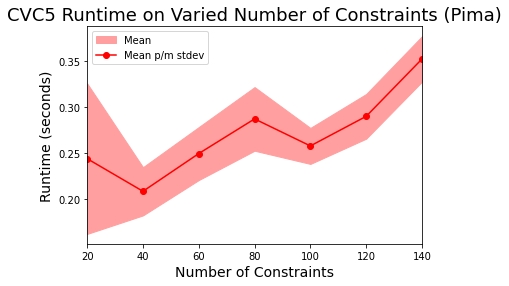

In [11]:
plotRunTime()